In [70]:
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import sys
from os.path import dirname
sys.path.append(dirname("../../"))

from src.utilities import *
from src.reccomendation_util import *

In [3]:
%load_ext autoreload
%autoreload 2

### Get Metadata

In [4]:
recipe_metadata = pd.read_csv("../../data/recommendation/RAW_recipes.csv")
recipe_metadata.shape

(231637, 13)

### get embeddings from saved models

In [5]:
model1 = load_pickle("../../models/reccomender_model1_svd.pkl")
user_embeddings1,item_embeddings1 = get_embeddings(model1)
user_embeddings1.shape, item_embeddings1.shape

user shape:192268, item shape:211330


((192268, 5), (211330, 5))

In [6]:
user_embeddings1_df = embed_to_df(model1, user_embeddings1, "user")
item_embeddings1_df = embed_to_df(model1, item_embeddings1, "item")
user_embeddings1_df.shape, item_embeddings1_df.shape

((192268, 6), (211330, 6))

In [7]:
user_embeddings1_df.head()

,latent_1,latent_2,latent_3,latent_4,latent_5,user_id
0,0.024521,0.038209,-0.008872,-0.067897,-0.003621,128227
1,-0.045135,-0.075402,0.122535,0.093276,-0.004651,1783751
2,0.090806,0.092832,-0.171623,-0.030718,-0.209589,969623
3,0.009108,0.050022,-0.258328,0.003528,0.319874,382071
4,-0.017693,-0.008981,0.064021,-0.054127,0.179990,218105


In [8]:
item_embeddings1_df.head()

,latent_1,latent_2,latent_3,latent_4,latent_5,item_id
0,0.152974,-0.022910,-0.105195,-0.006025,-0.232331,47391
1,0.019137,0.026862,-0.010062,-0.046274,-0.079486,89750
2,0.084967,0.071482,-0.014295,-0.178017,-0.374417,79378
3,-0.062906,-0.145410,-0.073990,0.099253,0.120585,413590
4,0.013514,-0.062923,-0.054340,-0.029447,-0.234791,13707


### Create TSNE Embeddings

In [9]:
# tsne = TSNE(n_components=2, n_iter=500, verbose=1, random_state=1)
# tsne_item1 = tsne.fit_transform(item_embeddings1_df.drop(columns=["item_id"]))

In [10]:
# tsne_projection = pd.DataFrame(columns=['x', 'y'], data=tsne_item1)
# tsne_projection["item_id"] = item_embeddings1_df["item_id"]
# tsne_projection.to_csv("../../data/recommendation/tsne_projection1.csv")

In [11]:
tsne_projection = pd.read_csv("../../data/recommendation/tsne_projection1.csv")

### Visualise 

In [12]:
merged = recipe_metadata.merge(tsne_projection, left_on=["id"], right_on = ["item_id"], how="inner")
recipe_metadata.shape,tsne_projection.shape, merged.shape

((231637, 13), (211330, 4), (211330, 17))

In [29]:
recipe_metadata.head()

,Unnamed: 0,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [50]:
def str_to_list(x):
    return list(map(lambda z: int(z), x.strip('[').strip(']').split(',')))

In [53]:
import ast
merged["ingredients_list"] = merged["ingredients"].apply(lambda x: ast.literal_eval(x))
merged['nutrition_list'] = merged['nutrition'].apply(lambda x: ast.literal_eval(x))

In [54]:
merged[['calories','fat_dv',"sugar_dv",\
           "sodium_dv","protein_dv","sat_fat", "carbs_dv"]\
      ] = pd.DataFrame(merged.nutrition_list.tolist(), index= merged.index)

In [56]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211330 entries, 0 to 211329
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0_x      211330 non-null  int64  
 1   name              211329 non-null  object 
 2   id                211330 non-null  int64  
 3   minutes           211330 non-null  int64  
 4   contributor_id    211330 non-null  int64  
 5   submitted         211330 non-null  object 
 6   tags              211330 non-null  object 
 7   nutrition         211330 non-null  object 
 8   n_steps           211330 non-null  int64  
 9   steps             211330 non-null  object 
 10  description       206784 non-null  object 
 11  ingredients       211330 non-null  object 
 12  n_ingredients     211330 non-null  int64  
 13  Unnamed: 0_y      211330 non-null  int64  
 14  x                 211330 non-null  float64
 15  y                 211330 non-null  float64
 16  item_id           21

In [57]:
merged.to_csv("../../data/recommendation/merged_projection1.csv")

#### Plots

In [64]:
merged[["calories"]].describe()

,calories
count,211330.000000
mean,473.567511
std,1226.888238
min,0.000000
25%,174.200000
50%,312.750000
75%,518.500000
max,434360.200000


In [71]:
(merged[["calories"]]>2500).mean(),(merged[["calories"]]>5000).mean()

(calories    0.018786
 dtype: float64,
 calories    0.004524
 dtype: float64)

In [72]:
merged["calories1"] = np.where(merged["calories"]<=2500, merged["calories"], 2500)

In [74]:
merged[["x","y",'calories','fat_dv',"sugar_dv",\
           "sodium_dv","protein_dv","sat_fat", "carbs_dv"]].corr()

,x,y,calories,fat_dv,sugar_dv,sodium_dv,protein_dv,sat_fat,carbs_dv
x,1.000000,0.031071,0.002839,0.004117,0.001699,-0.001458,-0.001202,0.004205,0.001872
y,0.031071,1.000000,-0.000545,0.001584,-0.002633,0.002269,0.001486,0.000688,-0.001757
calories,0.002839,-0.000545,1.000000,0.588879,0.869602,0.168079,0.483415,0.537317,0.907679
fat_dv,0.004117,0.001584,0.588879,1.000000,0.159737,0.153668,0.506499,0.869507,0.209457
sugar_dv,0.001699,-0.002633,0.869602,0.159737,1.000000,0.083680,0.189930,0.161245,0.982260
sodium_dv,-0.001458,0.002269,0.168079,0.153668,0.083680,1.000000,0.225380,0.143796,0.109370
protein_dv,-0.001202,0.001486,0.483415,0.506499,0.189930,0.225380,1.000000,0.491340,0.239754
sat_fat,0.004205,0.000688,0.537317,0.869507,0.161245,0.143796,0.491340,1.000000,0.207325
carbs_dv,0.001872,-0.001757,0.907679,0.209457,0.982260,0.109370,0.239754,0.207325,1.000000


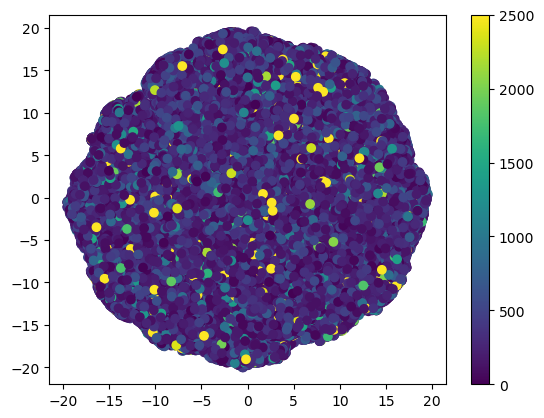

In [73]:
plt.scatter(merged["x"], merged["y"], c=merged["calories1"], cmap='viridis')
plt.colorbar()

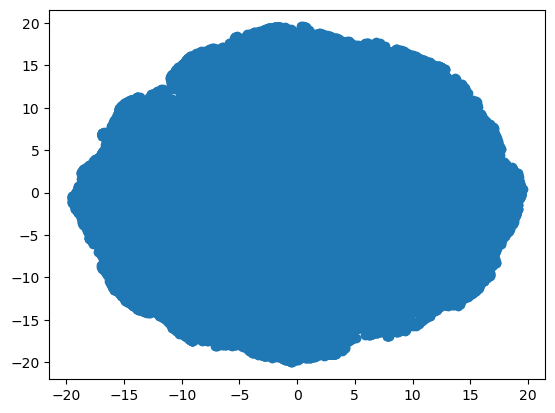

In [47]:
plt.scatter(merged["x"],merged["y"],co)